# Universidad Nacional Autónoma de México
## Instituto de Investigaciones en Matemáticas Aplicadas y en Sistemas
### Matemáticas Discretas. Proyecto Final. 
#### Ayala Salcedo Marlene Viviane
#### Fuentes Cruz Luis Ariel 

## Librerías empleadas

In [ ]:
import pandas as pd
import numpy as np
import random as rd 
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.pyplot import figure
import sympy as sp
import os
import imageio
from PIL import Image 
import PIL 
import glob
import matplotlib.animation as animation
from IPython.display import Image as img

## Importación y carga de bases de datos

Se emplearon dos bases de datos; la principal se ha nombrado como *AfluenciaMetro*, misma que guarda las alfuencias registradas durante el periodo $01/01/2021 - 30/09/2021$ en cada una de las estaciones 163 estaciones (sin contar transbordos) de la red del Sistema de Transporte Colectivo Metro. 

La segunda base empleada se ha nombrado *Coordenadas* y posee la ubicación exacta de las estaciones de toda la red de transporte colectivo Metro. Esta base se empleó para una presentación de los resultados más amigable al usuario.

In [ ]:
DF = pd.read_csv("AfluenciaMetro.csv",encoding='latin-1')
DF.head()

,fecha,dia,mes,ano,linea,estacion,afluencia,DiaSemana
0,01/01/2021,1,Enero,2021,Linea1,Pantitlan,8639,4
1,02/01/2021,2,Enero,2021,Linea1,Pantitlan,16708,5
2,03/01/2021,3,Enero,2021,Linea1,Pantitlan,13348,6
3,04/01/2021,4,Enero,2021,Linea1,Pantitlan,27129,0
4,05/01/2021,5,Enero,2021,Linea1,Pantitlan,24221,1


In [ ]:
Loc = pd.read_csv("Coordenadas.csv")
Loc.head()

,Longitud,Latitud,name
0,19.371924,-99.170998,20deNoviembre
1,19.364252,-99.005978,Acatitla
2,19.372926,-99.107398,Aculco
3,19.404046,-99.069825,AgricolaOriental
4,19.435474,-99.136709,Allende


## Tratamiento de los datos

Una vez realizada la limpieza de datos, detallada en los reportes anexos a este Notebook, se procedió de la siguiente manera; 

* Se crearon listas, correspondientes a cada una de las líneas del STC Metro, para guardar en ellas las estaciones correspondientes a cada línea. 

* Se creó, a partir de las listas anteriores, un conjunto con todas las estaciones del STC Metro sin contar los transbordos. 

* Se creó un diccionario sobre el conjunto anterior empleando los nombres de las estaciones y un índice. 

* Se crearon listas auxiliares para obtener las conexiones entre estaciones y, por tanto, tener un mapeo de las estaciones. *i.e. esto nos ayuda a crear listas con los elementos; Universidad -> Copilco ; Copilco -> Miguel A. De Quevedo ...*. 

* A partir de las listas anteriores se creó un data frame que guardara la conexión entre una estación y otra, así como el índice correspondiente a la estación de inicio y a la estación final.



In [ ]:
#Estaciones de cada línea almacenadas en su correspondiente lista
Linea1 = ["Pantitlan","Zaragoza", "GomezFarias","Blvd.PuertoAereo","Balbuena","Moctezuma","SanLazaro","Candelaria","Merced","PinoSuarez","IsabelLaCatolica","SaltodelAgua","Balderas","Cuauhtemoc","Insurgentes","Sevilla","Chapultepec","Juanacatlan","Tacubaya","Observatorio"]
Linea2 = ["CuatroCaminos","Panteones","Tacuba","Cuitlahuac","Popotla","ColegioMilitar","Normal","SanCosme","Revolucion","Hidalgo","BellasArtes", "Allende","Zocalo","PinoSuarez","SanAntonioAbad","Chabacano","Viaducto","Xola","VillaDeCortes","Nativitas","Portales","Ermita","GeneralAnaya","Tasquena"]
Linea3 = ["IndiosVerdes","Deptvo.18deMarzo","Potrero","LaRaza","Tlatelolco","Guerrero","Hidalgo","Juarez","Balderas","NinosHeroes","HospitalGeneral","CentroMedico","Etiopia","Eugenia","DivisionDelNorte","Zapata","Coyoacan","Viveros","MiguelA.deQ.","Copilco","Universidad"]
Linea4 = ["MartinCarrera","Talisman","Bondojito","Consulado","CanaldelNorte","Morelos","Candelaria","FrayServando","Jamaica","SantaAnita"]
Linea5 = ["Pantitlan","Hangares","TerminalAerea","Oceania","Aragon","EduardoMolina","Consulado","ValleGomez","Misterios","LaRaza","AutobusesdelNorte","InstitutoDelPetroleo","Politecnico"]
Linea6 = ["ElRosario","Tezozomoc","Azcapotzalco","Ferreria","Norte45","Vallejo","InstitutoDelPetroleo","Lindavista","Deptvo.18deMarzo","LaVilla-Basilica","MartinCarrera"]
Linea7 = ["ElRosario", "AquilesSerdan","Camarones","Refineria","Tacuba","SanJoaquin","Polanco","Auditorio","Constituyentes","Tacubaya","SanPedrolosPinos","SanAntonio","Mixcoac","BarrancadelMuerto"]
Linea8 = ["Garibaldi", "BellasArtes","SanJuanLetran","SaltodelAgua","Doctores","Obrera","Chabacano","LaViga","SantaAnita","Coyuya","Iztacalco","Apatlaco","Aculco","Escuadron201","Atlalilco","Iztapalapa","CerrodelaEstrella","UAMI","Constitucionde1917"]
Linea9 = ["Tacubaya","Patriotismo","Chilpancingo","CentroMedico","LazaroCardenas","Chabacano","Jamaica","Mixiuhca","Velodromo","CiudadDeportiva","Puebla","Pantitlan"]
LineaA = ["Pantitlan","AgricolaOriental","CanaldeSanJuan","Tepalcates","Guelatao","PenonViejo","Acatitla","SantaMarta","LosReyes","LaPaz"]
LineaB = ["CiudadAzteca","PlazaAragon","Olimpica","Ecatepec","Muzquiz","RioDeLosRemedios","Impulsora","Nezahualcoyotl","VilladeAragon","BosquedeAragon","DeportivoOceania","Oceania","RomeroRubio","RicardoFloresMagon","SanLazaro","Morelos","Tepito","Lagunilla","Garibaldi","Guerrero","Buenavista"]
Linea12 = ["Tlahuac","Tlaltenco","Zapotitlan","Nopalera","Olivos","Tezonco","PerifericoOriente","Calle11","LomasEstrella","SanAndresTomatlan","Culhuacan","Atlalilco","Mexicaltzingo","Ermita","EjeCentral","ParquedelosVenados","Zapata","20deNoviembre","InsurgentesSur","Mixcoac"]

#Lista base para crear el conjunto de estaciones sin transbordos.
Estaciones = Linea1 + Linea2 + Linea3 + Linea4 + Linea5 + Linea6 + Linea7 + Linea8 + Linea9 + LineaA + LineaB + Linea12

#Lista de listas con las líneas del STC Metro
Lineas = [Linea1, Linea2, Linea3, Linea4, Linea5, Linea6, Linea7, Linea8, Linea9, LineaA, LineaB, Linea12 ]

#Conjunto de estaciones sin transbordos
Estaciones_set = set(Linea1 + Linea2 + Linea3 + Linea4 + Linea5 + Linea6 + Linea7 + Linea8 + Linea9 + LineaA + LineaB + Linea12)
Estaciones_set = list(Estaciones_set) #Se guarda como lista

#Diccionario con los nombres de las estaciones y un índice numérico
my_dict = {Estaciones_set[i] : i for i in range(len(Estaciones_set))}

In [ ]:
#Creación del data frame con las "conexiones" entre estaciones y, por tanto, de líneas. 
df = pd.DataFrame()
df["Inicio"] = Linea1[0:-1] + Linea2[0:-1] + Linea3[0:-1] + Linea4[0:-1] +  Linea5[0:-1] + Linea6[0:-1] + Linea7[0:-1] + Linea8[0:-1] +  Linea9[0:-1] + LineaA[0:-1] + LineaB[0:-1] + Linea12[0:-1]
df["Final"] = Linea1[1:] + Linea2[1:] + Linea3[1:] + Linea4[1:] +  Linea5[1:] + Linea6[1:] + Linea7[1:] + Linea8[1:] +  Linea9[1:] + LineaA[1:] + LineaB[1:] + Linea12[1:]

#Obtenemos los índices del diccionario asociados a cada una de las "conexiones" entre líneas
L = list(df["Inicio"].values) #Obtenemos los nombres
M = list(df["Final"].values)
indice_inicio = []
indice_final = []
for i in range(len(L)): #Almacenamos en listas
  indice_inicio.append( my_dict[L[i]] )
  indice_final.append( my_dict[M[i]] )

#Anexamos las columnas al dataframe
df["Indice_Inicio"]  = indice_inicio
df["Indice_Final"] = indice_final
df

,Inicio,Final,Indice_Inicio,Indice_Final
0,Pantitlan,Zaragoza,157,128
1,Zaragoza,GomezFarias,128,1
2,GomezFarias,Blvd.PuertoAereo,1,100
3,Blvd.PuertoAereo,Balbuena,100,32
4,Balbuena,Moctezuma,32,33
...,...,...,...,...
178,EjeCentral,ParquedelosVenados,141,35
179,ParquedelosVenados,Zapata,35,23
180,Zapata,20deNoviembre,23,159
181,20deNoviembre,InsurgentesSur,159,68


## Preparación de los datos para el algoritmo

Se debe tener en consideración que; 

* La base de datos sólo presenta la afluencia diaria, es decir, no presenta información sobre la afluencia de la estación por horario. 

* En el caso de los transbordos, la base de datos no presenta información referente a cada una de las líneas, sino lo presenta como una única estación. *i.e. no teníamos datos de la forma Zapata (línea 12) = 12 546 ; Zapata (línea 3) = 10 568 sino un dato de la forma Zapata = 22 456* . 

Teniendo en consideración las condiciones anteriores de la base de datos, se procedió de la siguiente manera; 

* Se busca crear la matriz de adyacencia asociada a la red de STC Metro. Esta matriz, además, guardará la afluencia promedio por día de la semana de cada una de las estaciones. 

* Para determinar la afluencia promedio por día de la semana de cada estación, primero debemos sumar cada afluencia por estación y posteriormente dividir entre el número de registros correspondientes a tal estación.

In [ ]:
#Convertimos a lista los índices de cada "conexión" entre estaciones.
I = list(df["Indice_Inicio"].values)
J = list(df["Indice_Final"].values)

In [ ]:
#Prealocamos la matriz de adyacencia. 163 son el número de estaciones de la red del STC Metro sin contar transbordos
M = np.zeros((163,163))
#También prealocamos una matriz que cuente la afluencia total por estación por día de la semana
TotAff = np.zeros((163,7))
#Y otra que cuente el número de registros por estación por día de la semana
count = np.zeros((163,7))

#Se cuenta la afluencia total y el número de registros
for i in range(len(DF["afluencia"])):
  for j in list(my_dict.keys()):
    if DF["estacion"].iloc[i] == j:
      for k in range(7):
        if DF["DiaSemana"].iloc[i] == k:
          TotAff[my_dict[j]][k] += DF["afluencia"].iloc[i]
          count[my_dict[j]][k] += 1

#Finalmente, prealocamos y llenamos una matriz con las afluencias promedio
MeanAff = np.zeros((163,7))
for i in range(163):
  for j in range(7):
    MeanAff[i][j] = TotAff[i][j] / count[i][j]

In [ ]:
#day empieza en 0 y se refiere a Lunes, 1 = Martes ... 6 = Domingo
def DailyGraph(day):
  """ 
  function: DailyGraph params: day (int 0 <= x <= 6 )
  Donde x = 0 se refiere a Lunes, x = 1 se refiere a Martes...
  x = 6 se refiere a Domingo. 

  La función regresa la matriz de afluencia dado el día requerido. 
  """
  data = pd.DataFrame(list(my_dict.values()))
  data.rename(columns={0:'numero estacion'}, inplace=True)
  #data["estacion"] = pd.DataFrame(list(my_dict.keys()))
  data["Afluencia"] = MeanAff[:,day]
  I = list(df["Indice_Inicio"].values)
  J = list(df["Indice_Final"].values)
  M = np.zeros((163,163))
  for i in range(183):
    M[I[i]][J[i]] = data["Afluencia"].loc[J[i]]
    M[J[i]][I[i]] = data["Afluencia"].loc[I[i]]
  return(M)

## Algoritmo a emplear. 


El algoritmo de Dijkstra es un algoritmo de gráficas que determina el camino más corto dado un vértice de origen hacia el resto de vértices del grafo con pesos en cada arista. 

El algoritmo está dado por;

Sea $G$ un grafo dirigido ponderado de $N$ nodos no aislados y sea $x$ el nodo inicial. Definiremos un vector $D$ de tamaño $N$ que guardará la distancia entre $x$ hacia el resto de nodos. Además, sea $V$ un vector de $N$ entradas que funcionará para llevar control sobre los nodos ya visitados. 

* Inicializamos las distancias de $D$ con un valor relativamente grande (infinito, teóricamente) salvo la entrada correspondiente a $x$, misma que será 0. 

* Sea $a = x$, donde $a$ denota el vértice actual. 

* Se recorren los nodos adyacentes de $a$, salvo los nodos ya visitados. Denotemos a los nodos no visitados como $v_i$. 

* Para el nodo actual, se calcula la distancia desde ese nodo hasta sus vecinos bajo la expresión $d(v_i) = D_a + d(a,v_i)$. Esto es, la distancia tentativa del nodo $v_i$ es la distancia que actualmente tiene el nodo en el vector $D$ más la distancia desde el nodo actual hasta el nodo $v_i$. Si la distancia tentativa es menor que la distancia almacenada en el vector, entonces se actualiza el vector con esa distancia tentativa. 

* Marcamos como visitado al nodo $a$. 

* Se toma como próximo nodo actual el de menor valor en $D$ y se vuelve al tercer paso mientras haya nodos no visitados. 

El algoritmo implementado a continuación hace la modificación al algoritmo original para recibir un diccionario, mismo que ayudará a regresar el camino más óptimo de una estación a otra.

In [ ]:
def dijkstra(G,ni,nf,d=my_dict):
  """
  function: dijkstra, params: (G (nx.graph), ni (int), nf (int), d (dict))
  ni = Nodo inicial
  nf = Nodo final 
  d = default(my_dict) (Diccionario con las estaciones de la red del STC Metro)

  La función regresa el camino con menos afluencia entre el nodo inicial y el nodo final. 
  """
  u=d[ni]
  v=d[nf]
  masinf=float('inf')
  vertices=list(G.nodes)
  distancias={w:masinf for w in vertices}
  fijos={w:False for w in vertices}
  padres={w:None for w in vertices}
  distancias[u]=0
  fijos[u]=True
  nuevo_fijo=u

  while not(all(fijos.values())):
      # Acualizar distancias.
      for w in G.neighbors(nuevo_fijo):
          if fijos[w]==False:
              nueva_dist=distancias[nuevo_fijo]+G[nuevo_fijo][w]['weight']
              if distancias[w]>nueva_dist:
                  distancias[w]=nueva_dist
                  padres[w]=nuevo_fijo

      # Encontrar el nuevo a fijar.
      mas_chica=masinf
      for w in vertices:
          if fijos[w]==False and distancias[w]<mas_chica:
              optimo=w
              mas_chica=distancias[w]
      nuevo_fijo=optimo
      fijos[nuevo_fijo]=True

      # Cuando fije el vértice final v, dar el camino.
      if nuevo_fijo==v:
          camino=[v]
          while camino[0]!=u:
              camino=[padres[camino[0]]]+camino
          #Obtenemos los nombres de los nodos
          key_list = list(d.keys())
          val_list = list(d.values())
          cam=[]
          for c in camino:
            position = val_list.index(c)
            cam.append(key_list[position])
          return cam

## Funciones para la implementación. 


Ahora, debemos implementar una serie de funciones que nos ayudarán a visializar el resultado final. 

Comenzaremos con `RutaMetro`, que es una función que recibe una estación final y una estación inicial y regresa el camino menos afluente. 

Posteriormente, se implementó ``Colors`, misma que regresa una lista con los colores que identifican a cada estación de la red del STC Metro y a la ruta menos afluente.

In [ ]:
#dia es un parámetro que va de 0 a 6; 0 = Lunes ... 6 = Domingo
def RutaMetro(dia,estacioninicial,estacionfinal):
  """
  function: RutaMetro, params: (dia (int), estacioninicial (str), estacionfinal (str))

  La función regresa el camino menos afluente a seguir para llegar de una estación inicial
  a otra estación final dado el día en el que se quiere viajar. 
  """
  M = DailyGraph(dia)
  G = nx.from_numpy_matrix(np.matrix(M), create_using=nx.DiGraph)
  path = dijkstra(G,estacioninicial,estacionfinal,d=my_dict)
  return path

In [ ]:
def Colors(path):
  """
  function: Colors, params: (path (lst) )
  La función regresa una lista con los colores que identifican a cada estación de la red
  del STC Metro y a la ruta menos afluente.
  """
  listofcolors = [] #Lista de colores
  pathidx = [] #Lista de índices de las estaciones en el camino menos afluente
  for i in range(len(Loc["name"])):
    if Loc["name"][i] in path: #Anexamos los índices si corresponden al camino
      pathidx.append(i)
    if Loc["name"][i] in Linea1: #Identificación de colores de las diferentes rutas de la red de STC Metro
      listofcolors.append("deeppink")
    elif Loc["name"][i] in Linea2:
      listofcolors.append("royalblue")
    elif Loc["name"][i] in Linea3:
      listofcolors.append("olive")
    elif Loc["name"][i] in Linea4:
      listofcolors.append("mediumaquamarine") 
    elif Loc["name"][i] in Linea5:
      listofcolors.append("yellow")
    elif Loc["name"][i] in Linea6:
      listofcolors.append("firebrick")
    elif Loc["name"][i] in Linea7:
      listofcolors.append("orange") 
    elif Loc["name"][i] in Linea8:
      listofcolors.append("lime")
    elif Loc["name"][i] in Linea9:
      listofcolors.append("saddlebrown")
    elif Loc["name"][i] in LineaA:
      listofcolors.append("darkviolet") 
    elif Loc["name"][i] in LineaB:
      listofcolors.append("grey")
    elif Loc["name"][i] in Linea12:
      listofcolors.append("goldenrod")
  for idx in pathidx:
    listofcolors[idx] = "red" #Cambiamos el color a los nodos de la ruta menos afluente
  return(listofcolors)

### Preparación de datos visualizados. 

Debido a que nuestro programa regresará un GIF con la ruta menos afluente, debemos preparar algunos datos para lograrlo. 

In [ ]:
#Creamos listas que guarden las latitudes y longitudes de cada estación de cada línea
xs = [[] for _ in range(12)]
ys = [[] for _ in range(12)]

#Guardamos latitudes y longitudes de cada estación por líneas
for i in range(12):
  for j in range(len(Lineas[i])):
    x = float(Loc["Latitud"].loc[ Loc.loc[:,"name"] == Lineas[i][j] ].values)
    xs[i].append(x)
    y = float(Loc["Longitud"].loc[ Loc.loc[:,"name"] == Lineas[i][j] ].values)
    ys[i].append(y)
    
#Creamos los scatter points correspondientes a las estaciones del metro a través de su ubicación

coordsx = []
coordsy = []
names = []

#Anexamos las coordenadas en longitud y latitud
for i in range(len(Loc["Latitud"])):
  coordsx.append(float(Loc["Latitud"][i]))
  coordsy.append(float(Loc["Longitud"][i]))
  names.append(Loc["name"][i])


Ahora, seguiremos con la implementación de funiones auxiliares. 

Generaremos una función `GraphPath`, misma que devolverá un mapa de las líneas de la red del STC Metro, resaltando en ella una ruta indicada. 

In [ ]:
def GraphPath(path):
  """
  function: GraphPath, params: (path (lst))
  Devuelve una gráfica de la red del STC Metro con el camino menos afluente, 
  entre una estación inicial y una estación final, resaltado. 
  """
  pathx = []
  pathy = []

  #Buscamos las longitudes y latitudes de las estaciones del camino
  for j in range(len(path)):
    x = float(Loc["Latitud"].loc[ Loc.loc[:,"name"] == path[j] ].values)
    pathx.append(x)
    y = float(Loc["Longitud"].loc[ Loc.loc[:,"name"] == path[j] ].values)
    pathy.append(y)
  
  #Creamos la ventana gráfica
  fig = figure(figsize=(30, 20), dpi=80)

  #Generamos el color de los nodos
  listofcolors = Colors(path)
  
  
  #Graficamos los scatter points 
  plt.scatter(coordsx,coordsy, color = listofcolors, s = 100)
  plt.scatter(pathx,pathy, color = "red",  marker = "*", s = 500)

  #Anexamos las estaciones del camino menos afluente a las estaciones por línea
  XS = xs.copy()
  YS = ys.copy()
  XS.append(pathx)
  YS.append(pathy)

  #Colocamos nombres en la gráfica
  for i in range(len(Loc["Latitud"])):
    plt.text(coordsx[i]+0.001,coordsy[i]+0.001, names[i],fontsize=8)
  
  #Graficamos las líneas entre estaciones
  color = ["deeppink","royalblue","olive","mediumaquamarine","yellow","firebrick","orange","lime","saddlebrown","darkviolet","grey","goldenrod", "red"]
  for i in range(13):
    if i == 12:
      plt.plot(XS[i],YS[i],color = "red", linewidth = 6, alpha = 1)
    else:
      plt.plot(XS[i],YS[i],color = color[i], linewidth = 6, alpha = 0.5)

  #Formateamos la gráfica
  plt.axis('off')
  plt.legend(["Linea 1", "Linea 2", "Linea 3", "Linea 4", "Linea 5", "Linea 6", "Linea 7", "Linea 8", "Linea 9 ", "Linea A", "Linea B", "Linea 12", "Camino"],fontsize = 15)
  plt.title("MAPA DEL METRO DE LA CDMX",fontsize = 60)
  plt.close()
  return(fig)

Seguimos con una función que nos ayude a crear un gif de la ruta menos afluente. 

In [ ]:
def gif(path):
  """
  function: gif, params: (path (lst))
  Devuelve un gif que muestra el recorrido a seguir una vez se le haya especificado un camino. 
  """
  frames = [] 
  names = []
  #Para crear los frames, llamamos a la función GraphPath sobre slices del camino menos afluente
  for i in range(len(path)): 
    names.append(f"image{i}")
  for i in range(len(path)):
    image = GraphPath(path[0:i+1])
    image.savefig(f"{names[i]}.png") #Y se guardan como png
  
  #Eliminamos un gif anterior, si es que hubiera
  try:
    os.remove(r"/content/path.png")
  except:
    pass

  #Creamos el gif propiamente y lo guardamos con el nombre "path.png"
  for i in range(len(names)):
    new_frame = Image.open(f"{names[i]}.png")
    frames.append(new_frame)
  frames[0].save("path.gif", format = "GIF", append_images = frames[1:],save_all = True, duration = 300, loop = 0)

  #Eliminamos los frames y sólo nos quedamos con el gif. 
  for i in range(len(path)):
    os.remove(f"image{i}.png")

## Función Final

Finalmente, se presenta la función principal, que devuelve un gif con la ruta menos afluente para ir de una estación inicial a una estación final en un día especificado.

In [ ]:
def Main(estacioninicial,estacionfinal,dia):
  Ruta = RutaMetro(dia,estacioninicial,estacionfinal) #Obtenemos la ruta
  gif(Ruta) #Generamos las gráficas
  print(f"La ruta menos afluente para ir de {estacioninicial} a {estacionfinal} es; \n")
  print(f"{Ruta}\n")

Presentamos una llamada prueba a la función. 

**Nota**: Las últimas dos líneas, correspondientes a 

"!wget "/content/path.gif" #Presentamos

img( open('path.gif','rb').read())"

no pudieron incorporarse a la función Main, pues el operador "!" no funcionaba.

Para realizar más pruebas, se recomienda correr la siguiente celda únicamente modificando los nombres de las estaciones a las que se quiere ir. 

## Prueba de la función. 

La ruta menos afluente para ir de Pantitlan a Obrera es; 

['Pantitlan', 'Puebla', 'CiudadDeportiva', 'Velodromo', 'Mixiuhca', 'Jamaica', 'Chabacano', 'Obrera']

/content/path.gif: Scheme missing.


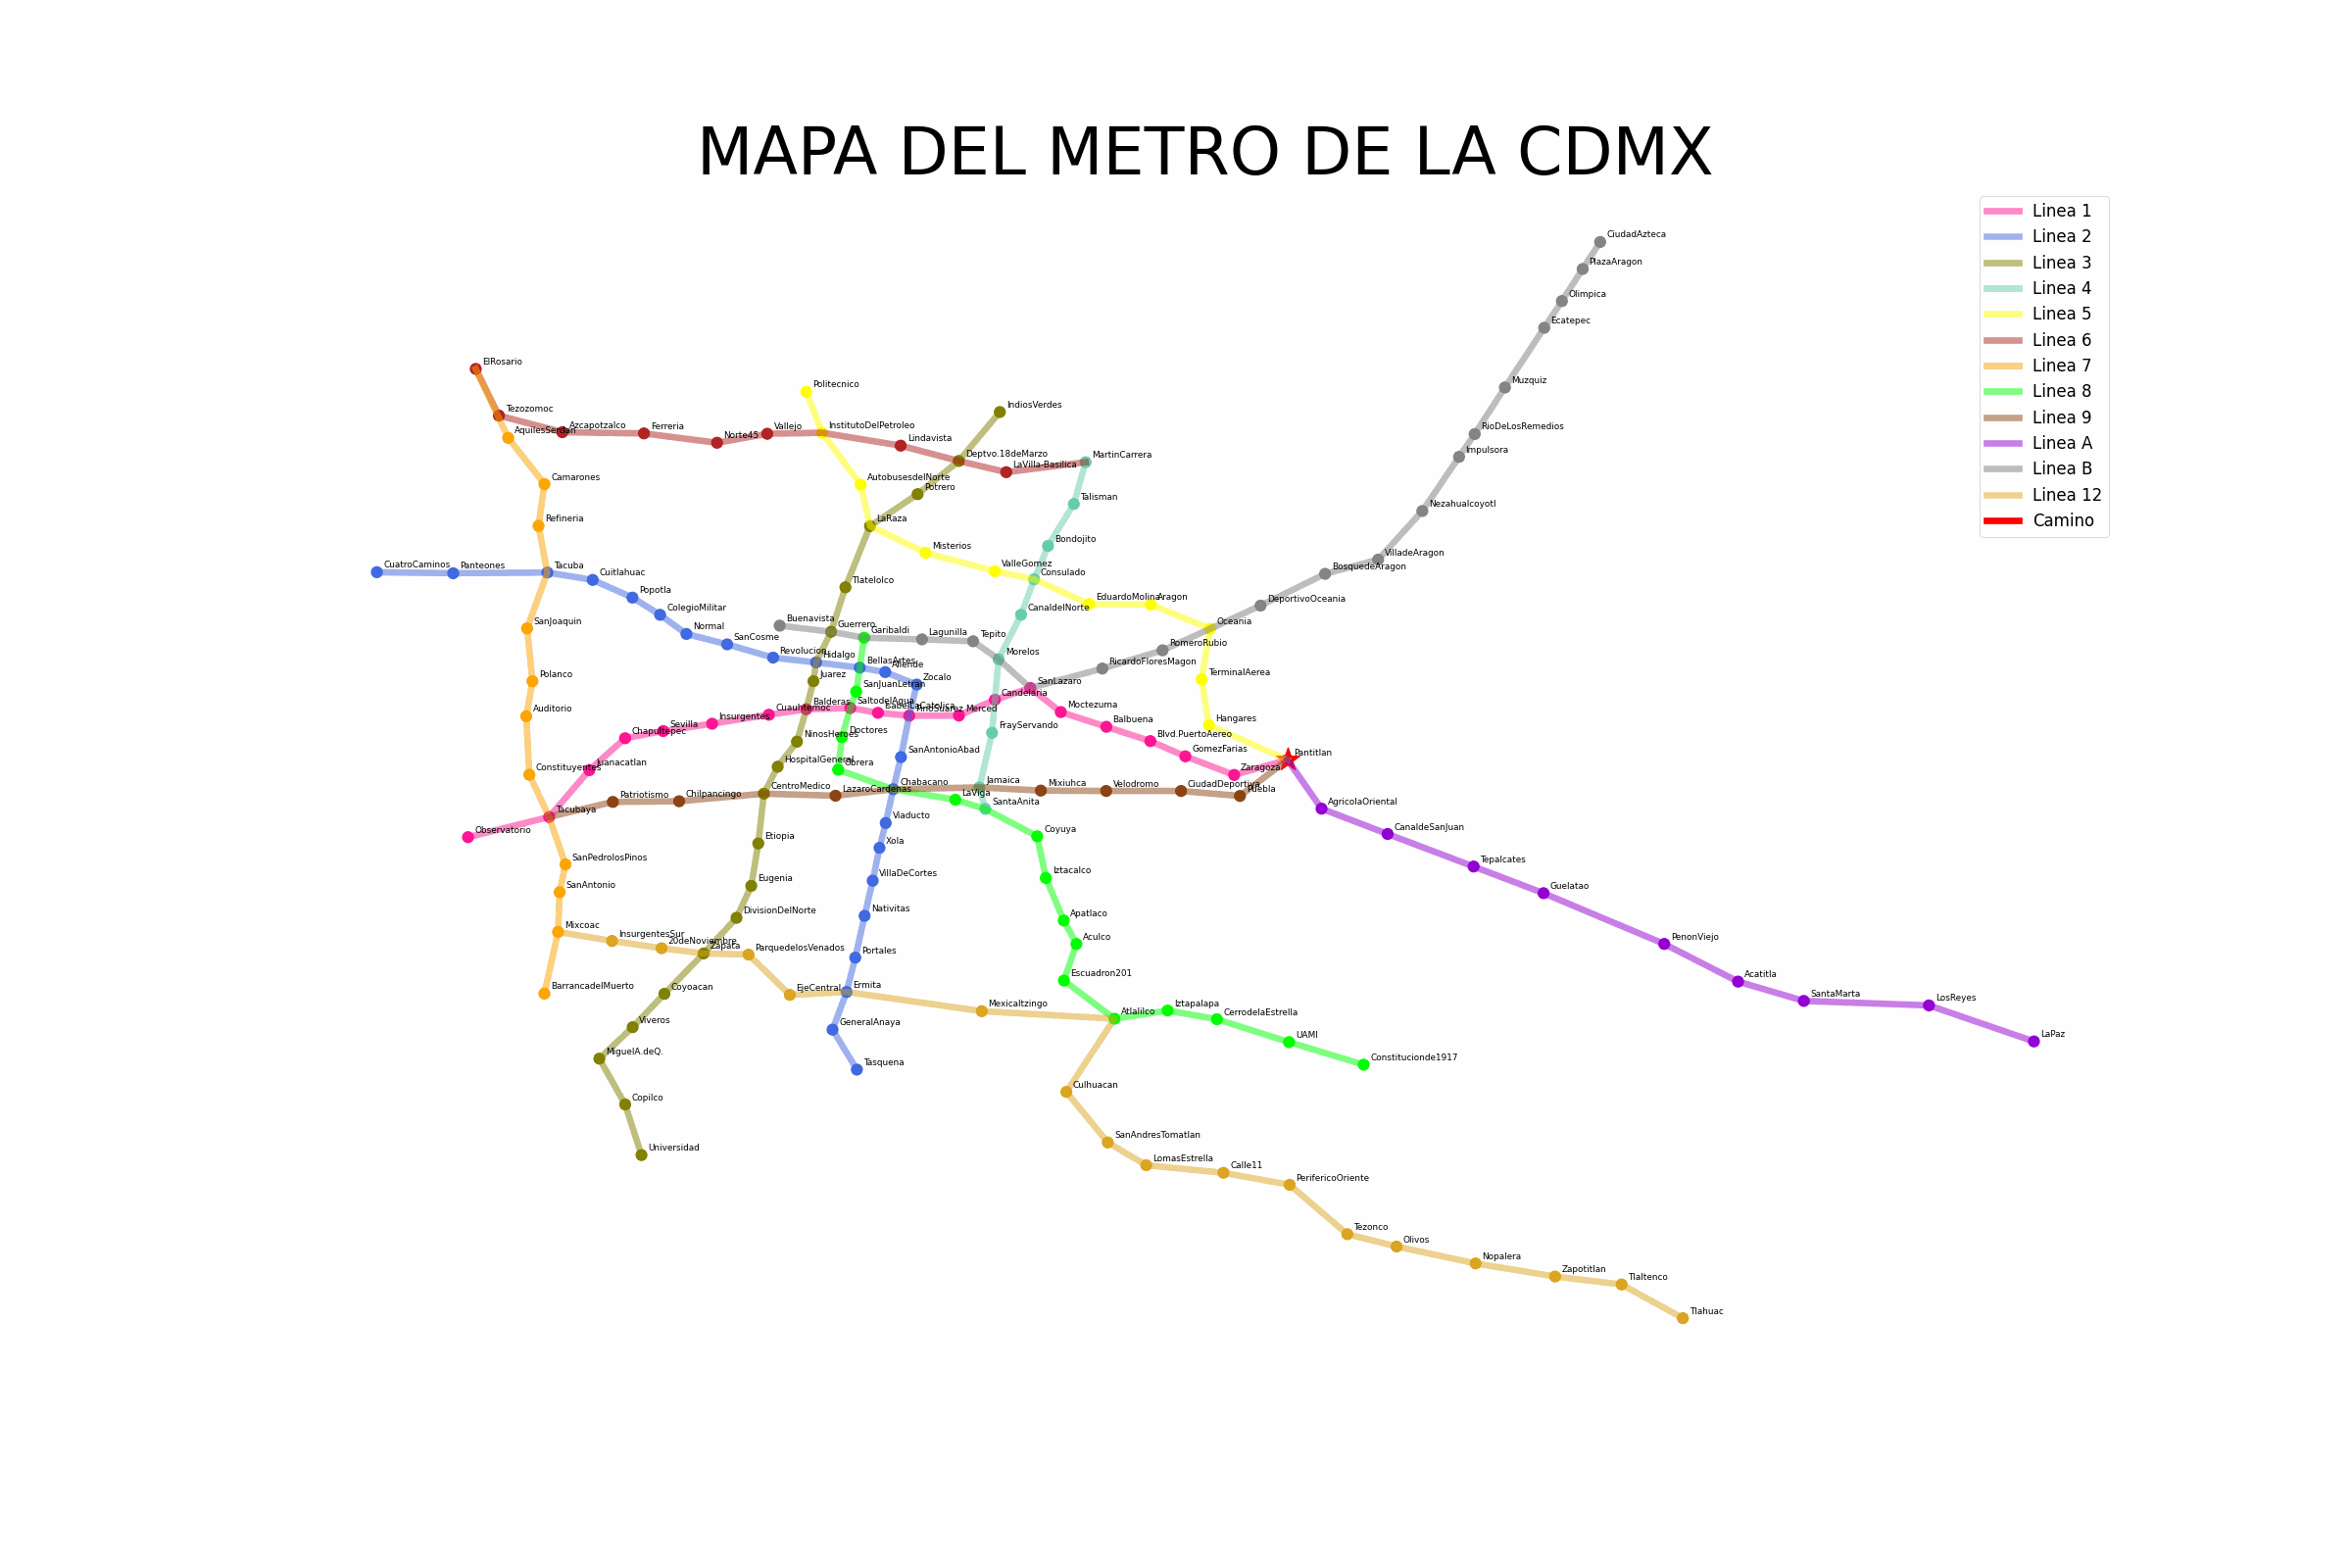

In [ ]:
Main("Pantitlan","Obrera",3)
!wget "/content/path.gif" #Presentamos
img( open('path.gif','rb').read())